#Proyecto Final
## Introduccion a la ciencia de datos
##**Predictor de estado tumoral benigno o maligno en cancer de mamá**




**Objetivo**: Predecir si el cáncer es benigno o maligno.\
Desarrollar un modelo predictivo basado en técnicas de ciencia de datos que permita clasificar de manera precisa y eficiente los tumores de cáncer de mama como benignos o malignos, utilizando un conjunto de datos con características detalladas de los tumores,contribuyendo así a la detección temprana y al tratamiento eficaz del cáncer de mama. Los datos se recuperaron de https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data.


In [ ]:
#librerias
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import classification_report
from sklearn import tree

In [ ]:
#leemos el data y lo visualizamos con pandas
data = pd.read_csv("data.csv")

#**Visualizamos datos (EDA)**

In [ ]:
data.head(5)
#M=maligno, B=benigno

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
len(data.columns)

33

In [ ]:
for i in data:
  print('datos unicos en:',i, len(data[i].unique()))

datos unicos en: id 569
datos unicos en: diagnosis 2
datos unicos en: radius_mean 456
datos unicos en: texture_mean 479
datos unicos en: perimeter_mean 522
datos unicos en: area_mean 539
datos unicos en: smoothness_mean 474
datos unicos en: compactness_mean 537
datos unicos en: concavity_mean 537
datos unicos en: concave points_mean 542
datos unicos en: symmetry_mean 432
datos unicos en: fractal_dimension_mean 499
datos unicos en: radius_se 540
datos unicos en: texture_se 519
datos unicos en: perimeter_se 533
datos unicos en: area_se 528
datos unicos en: smoothness_se 547
datos unicos en: compactness_se 541
datos unicos en: concavity_se 533
datos unicos en: concave points_se 507
datos unicos en: symmetry_se 498
datos unicos en: fractal_dimension_se 545
datos unicos en: radius_worst 457
datos unicos en: texture_worst 511
datos unicos en: perimeter_worst 514
datos unicos en: area_worst 544
datos unicos en: smoothness_worst 411
datos unicos en: compactness_worst 529
datos unicos en: conca

In [ ]:
#observamos el dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
#definicion de las variables numericas y categoricas del DataFrame
varibles_numericas1 = data.select_dtypes(include = [np.number])
variables_categoricas2 = data.select_dtypes(exclude= [np.number])

#se viasualizan los histogramas de cada columna
for i in varibles_numericas1:
  plt.title('Histograma:'+i)
  plt.hist(data[i])
  plt.grid()
  plt.show()

In [ ]:
#se visualizan los diagramas de cajas para cada columna
for i in varibles_numericas1:
  plt.title('box:'+i)
  plt.boxplot(data[i])
  plt.grid()
  plt.show()

#**DATA2 CLEANING**



In [ ]:
#se buscan valores faltantes
val_null = data.isnull().sum()
print(val_null)

In [ ]:
#eliminamos la columna con ceros que era justamente la ultima
data2 = data.dropna(axis = 1)

In [ ]:
#veamos si hay valores duplicados
data2.duplicated()
#en este caso no hay filas duplicadas



In [ ]:
#visualizacion del DataFrame2 sin la ultima columna
data2

In [ ]:
#definicion de la variables categoricas y numericas (data2) para su uso en el procesamiento de datos
varibles_numericas = data2.select_dtypes(include = [np.number])
variables_categoricas = data2.select_dtypes(exclude= [np.number])

In [ ]:
#definir solo las columnas numericas
columnas_numericas= (data2.columns).drop('diagnosis')


In [ ]:
columnas_numericas

In [ ]:
def tratar_outliers(df, columna):
    """
    Sustituye los outliers en una columna específica por los percentiles 25 o 75.
    Un valor se considera outlier si está fuera de 1.5 * IQR.
    """
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df[columna] = df[columna].clip(lower=limite_inferior, upper=limite_superior)
    return df

In [ ]:
for i in columnas_numericas:
  tratar_outliers(data2, i)

In [ ]:
data2

In [ ]:
#solo para visualizacion del tratamiento de valores atipicos
for i in columnas_numericas:
  plt.title('box:'+i)
  plt.boxplot(data2[i])
  plt.grid()
  plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
def estandarizar_datos(data, columnas_numericas):

    """
    Estandariza las columnas numéricas del DataFrame para que tengan media 0 y desviación estándar 1.
    """
    escalador = StandardScaler()
    data[columnas_numericas] = escalador.fit_transform(data[columnas_numericas])
    return data

In [ ]:
#para un manejo mas facil, se realiza una normalizacion de los datos
estandarizar_datos(data2, columnas_numericas)

In [ ]:
varibles_numericas.corr()

In [ ]:


corr_matrix = varibles_numericas.corr()
sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(corr_matrix,annot=False,fmt=".01"

In [ ]:
# Eliminación de redundancia columnar
def eliminar_redundancia_columnar(data, umbral_correlacion=0.9):
    """
    Elimina columnas altamente correlacionadas para evitar la multicolinealidad.
    """
    matriz_corr = data.corr().abs()
    triangulo_superior = matriz_corr.where(np.triu(np.ones(matriz_corr.shape), k=1).astype(bool))
    columnas_a_eliminar = [columna for columna in triangulo_superior.columns if any(triangulo_superior[columna] > umbral_correlacion)]
    data = data.drop(columnas_a_eliminar, axis=1)
    return data

In [ ]:
data3 = data2.drop(['diagnosis'], axis=1)

eliminar_redundancia_columnar(data3, 0.9)

In [ ]:
#para ver la cardinalidad de cada columna, como todas nuestras columnas son numricas no hace falta aplicar ningun metodo
#de reduccion de cardinalidad. la columna 'diagnosis' es la unica categorica y se usara para el arbol
for i in data3:
  print('numero de variables de la columna: \t', i, len(data3['area_mean']))

In [ ]:
data3

In [ ]:
len(data3.columns)

31

#**Modelado de datos - Random Forest**

In [ ]:
#usando rando tree comenzamos por dividimos por etiquetas los datos
data3.columns


Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
#dividir en x y y
x = data3[['id', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

y = data['diagnosis']

In [ ]:
def metodo(x,y):
  # Dividir el conjunto de datos en entrenamiento y prueba
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #Árbol de decisión
  ad=tree.DecisionTreeClassifier(max_features=3)

  #Bosque aleatorio
  rf = RandomForestClassifier(n_estimators=30  , random_state=0)


  # Entrenar el modelo
  rf=rf.fit(x_train, y_train)
  ad=ad.fit(x_train, y_train)

  # Predecir las etiquetas de los datos de prueba
  y_pred_rf = rf.predict(x_test)
  y_pred_ad = ad.predict(x_test)

  # Calcular la precisión del modelo
  accuracy_rf = accuracy_score(y_test, y_pred_rf)
  accuracy_ad = accuracy_score(y_test, y_pred_ad)
  print(f'Precisión del modelo Random Forest: {accuracy_rf:.2f}')
  print(f'Precisión del modelo Desicion Tree: {accuracy_ad:.2f}')

In [ ]:
metodo(x,y)

Precisión del modelo Random Forest: 0.96
Precisión del modelo Desicion Tree: 0.95


#**Resultados**

[Text(0.6473214285714286, 0.9444444444444444, 'x[4] <= 0.189\ngini = 0.467\nsamples = 455\nvalue = [286, 169]'),
 Text(0.4375, 0.8333333333333334, 'x[7] <= 0.227\ngini = 0.233\nsamples = 319\nvalue = [276, 43]'),
 Text(0.26785714285714285, 0.7222222222222222, 'x[14] <= 0.349\ngini = 0.091\nsamples = 272\nvalue = [259, 13]'),
 Text(0.14285714285714285, 0.6111111111111112, 'x[21] <= -0.094\ngini = 0.059\nsamples = 264\nvalue = [256, 8]'),
 Text(0.07142857142857142, 0.5, 'x[22] <= 1.299\ngini = 0.008\nsamples = 235\nvalue = [234, 1]'),
 Text(0.03571428571428571, 0.3888888888888889, 'gini = 0.0\nsamples = 221\nvalue = [221, 0]'),
 Text(0.10714285714285714, 0.3888888888888889, 'x[0] <= -0.58\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.07142857142857142, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.14285714285714285, 0.2777777777777778, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.21428571428571427, 0.5, 'x[22] <= 0.195\ngini = 0.366\nsamples =

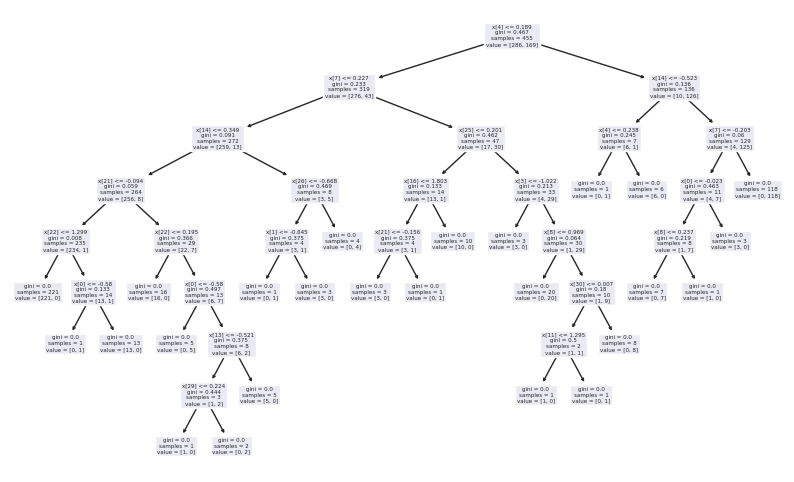

In [ ]:
tree.plot_tree(ad)

#**Evaluación**

In [ ]:
#evaluacion de la precision de la prediccion
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
report_ad = classification_report(y_test, y_pred_ad)
print(report_ad)

              precision    recall  f1-score   support

           B       0.94      0.94      0.94        71
           M       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



#**Pruebas**

In [ ]:
#pruebas
for i in range(0,20):
  print('prueba',i, metodo(x,y))

Precisión del modelo Random Forest: 0.96
Precisión del modelo Desicion Tree: 0.94
prueba 0 None
Precisión del modelo Random Forest: 0.96
Precisión del modelo Desicion Tree: 0.92
prueba 1 None
Precisión del modelo Random Forest: 0.96
Precisión del modelo Desicion Tree: 0.91
prueba 2 None
Precisión del modelo Random Forest: 0.96
Precisión del modelo Desicion Tree: 0.94
prueba 3 None
Precisión del modelo Random Forest: 0.96
Precisión del modelo Desicion Tree: 0.94
prueba 4 None
Precisión del modelo Random Forest: 0.96
Precisión del modelo Desicion Tree: 0.91
prueba 5 None
Precisión del modelo Random Forest: 0.96
Precisión del modelo Desicion Tree: 0.92
prueba 6 None
Precisión del modelo Random Forest: 0.96
Precisión del modelo Desicion Tree: 0.95
prueba 7 None
Precisión del modelo Random Forest: 0.96
Precisión del modelo Desicion Tree: 0.94
prueba 8 None
Precisión del modelo Random Forest: 0.96
Precisión del modelo Desicion Tree: 0.95
prueba 9 None
Precisión del modelo Random Forest: 0.96